In [77]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
%matplotlib inline

In [78]:
url ='https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv'
#url = 'https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2007/results.csv'
boston = pd.read_csv(url,delimiter=',',error_bad_lines=False) 

In [79]:
boston.tail(5)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
31979,50.72,"Anderson, Steve K.",3414,124.02,M,32,211.75,35908,7500,NaN,...,9849,8.08,CA,148.65,26.13,104.78,99.55,USA,Larkspur,200.22
31980,61.28,"McCarthy, Michael P.",5212,165.02,M,34,302.52,35909,15459,NaN,...,27456,11.55,MA,203.43,31.07,135.85,128.37,USA,Norwell,285.47
31981,59.00,"Brimmer, Delia C.",5231,157.02,F,21,282.00,35910,10788,NaN,...,25092,10.77,CT,192.65,28.18,130.57,123.33,USA,West Simsbury,266.30
31982,63.75,"Morganthal, Amy",5800,167.82,F,38,302.73,35911,12009,NaN,...,27476,11.55,MA,207.52,30.98,137.03,129.90,USA,North Andover,285.87
31983,53.63,"Kirchner, Jeffrey T.",1396,135.02,M,54,228.30,35912,9771,NaN,...,14844,8.72,PA,161.83,26.92,114.13,108.03,USA,Lancaster,216.48


In [80]:
boston.describe()

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


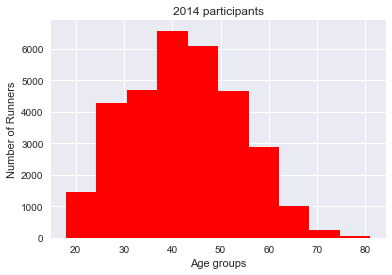

In [81]:
plt.hist(boston['age'], color='red', bins = 10)
plt.title('2014 participants') 
plt.xlabel('Age groups')
plt.ylabel('Number of Runners');


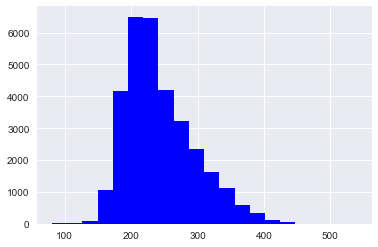

In [82]:
plt.hist(boston['official'], color='blue', bins = 20);

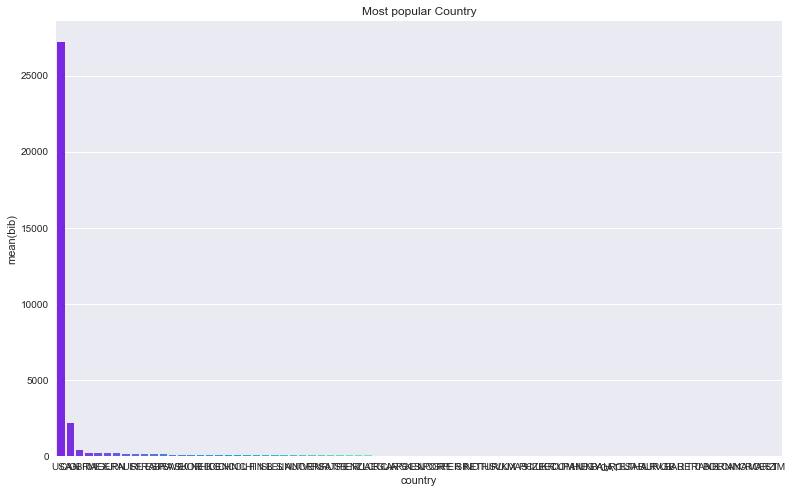

In [83]:
s = boston.groupby('country').count()['bib'].sort_values(ascending=False)
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_title("Most popular Country");

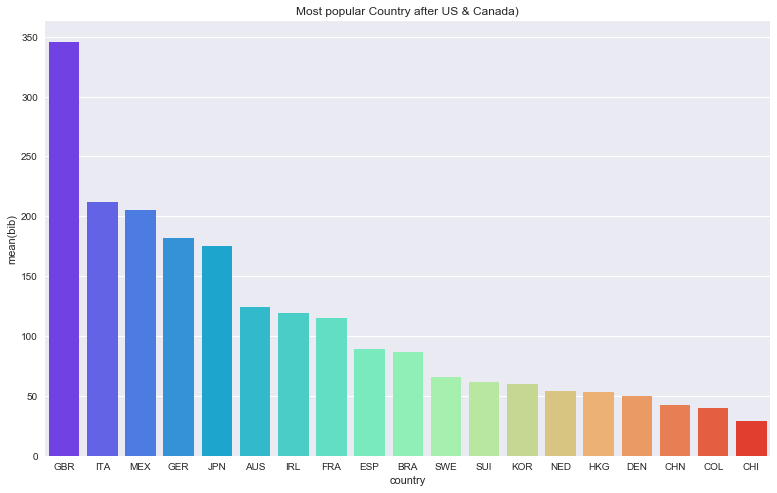

In [84]:
s = boston.groupby('country').count()['bib'].sort_values(ascending=False).head(21)[2:]
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_title("Most popular Country after US & Canada)");

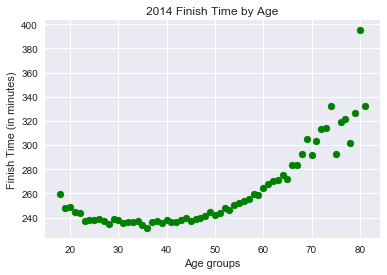

In [20]:
boston_avg = boston.groupby(['age'], as_index=False).mean()
plt.scatter(x = boston_avg['age'], y = boston_avg['official'],color = 'green')
plt.title('2014 Finish Time by Age') 
plt.xlabel('Age groups')
plt.ylabel('Finish Time (in minutes)');

In [21]:
boston.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [22]:
make_num = (['10k','25k','35k','30k','5k','half','20k','40k'])
for col in make_num:
    boston[col]= boston[col].str.replace('-', '')
    boston[col] = pd.to_numeric(boston[col])

In [23]:
boston.fillna(0, inplace=True)

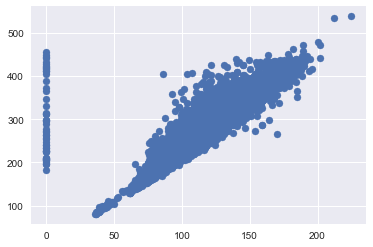

In [24]:
plt.scatter(y = boston['official'], x = boston['20k']);

In [25]:
drop = (['name','city','ctz','bib','state','country'])
make_dum = (['gender'])


In [26]:
boston_dum = pd.get_dummies(boston[make_dum])
boston = pd.concat([boston_dum, boston], axis=1)
boston['US'] = np.where(boston['country'] == 'USA', 1, 0)
boston = boston.drop(drop,1)
boston = boston.drop(make_dum,1)



In [27]:
boston = boston.query('official >  0')  # remove people who do not finish

In [28]:
boston.tail()

,gender_F,gender_M,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,US
31979,0,1,50.72,3414,124.02,32,211.75,7500,174.90,9849,8.08,148.65,26.13,104.78,99.55,200.22,1
31980,0,1,61.28,5212,165.02,34,302.52,15459,244.70,27456,11.55,203.43,31.07,135.85,128.37,285.47,1
31981,1,0,59.00,5231,157.02,21,282.00,10788,229.62,25092,10.77,192.65,28.18,130.57,123.33,266.30,1
31982,1,0,63.75,5800,167.82,38,302.73,12009,247.18,27476,11.55,207.52,30.98,137.03,129.90,285.87,1
31983,0,1,53.63,1396,135.02,54,228.30,9771,189.68,14844,8.72,161.83,26.92,114.13,108.03,216.48,1


In [29]:
boston.dtypes

gender_F       uint8
gender_M       uint8
10k          float64
division       int64
25k          float64
age            int64
official     float64
genderdiv      int64
35k          float64
overall        int64
pace         float64
30k          float64
5k           float64
half         float64
20k          float64
40k          float64
US             int32
dtype: object

In [30]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

X = boston
# Normalize the data.
X_norm = normalize(X)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2 = train_test_split(
    X_norm,
    test_size=0.5,
    random_state=None)
X1, X2 = train_test_split(
    X_half1,
    test_size=0.5,
    random_state=None)
X3, X4  = train_test_split(
    X_half2,
    test_size=0.5,
    random_state=None)

# K-means

In [31]:
n_clusters = (2,4,6,10,20,30,50)
for n in n_clusters:
    print("Number of estimated clusters: {}".format(n))
    for sample in [X1, X2, X3, X4]:
        model = KMeans(n_clusters=n, random_state=None).fit(sample)
        labels = model.labels_
        print(metrics.silhouette_score(sample, labels, metric='euclidean'))

Number of estimated clusters: 2
0.461123266438
0.456848950827
0.455823276967
0.443970863865
Number of estimated clusters: 4
0.495553456922
0.492784410429
0.491630306594
0.493802909674
Number of estimated clusters: 6
0.45090645057
0.447345056396
0.450771288082
0.45191203627
Number of estimated clusters: 10
0.549802112405
0.547529279146
0.547720333253
0.56309997622
Number of estimated clusters: 20
0.516403723739
0.513703717709
0.540311348713
0.526463058048
Number of estimated clusters: 30
0.510684382751
0.505199408234
0.510592497417
0.508647743069
Number of estimated clusters: 50
0.496856756621
0.49518475917
0.506655840541
0.511994270755


It appears that our ten-cluster solution most reliably produces clusters of datapoints that are closer to other datapoints in the cluster than they are to datapoints in the other clusters. This is good. What is also good is the consistency of the coefficient across our subsets.

In [32]:
# use 10
model = KMeans(n_clusters=10, random_state=None).fit(X1)
labels = model.labels_
print(metrics.silhouette_score(X1, labels, metric='euclidean'))
print(labels)

0.549802112405
[7 8 6 ..., 2 4 7]


# Mean-Shift

In [33]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [35]:
for sample in [X1, X2, X3, X4]:
    bandwidth = estimate_bandwidth(sample, quantile=0.2, n_samples=500)
    print("bandwidth: {}".format(bandwidth))
    #bandwidth = 0.3
    model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    model.fit(sample)
    labels = model.labels_
    cluster_centers = model.cluster_centers_
    n_clusters_ = len(np.unique(labels))
    print("Number of estimated clusters: {}".format(n_clusters_))
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

bandwidth: 0.16295859487816325
Number of estimated clusters: 4
0.527678417966
bandwidth: 0.1461517578161558
Number of estimated clusters: 4
0.526311842434
bandwidth: 0.15132172027124693
Number of estimated clusters: 4
0.517209162586
bandwidth: 0.16363250406906912
Number of estimated clusters: 4
0.521905702538


K-means did a little better. Also - it selected only 4 or 5 clusters but K-Means seemed to do better with 10 clusters.

# Spectral Clustering

In [36]:
from sklearn.cluster import SpectralClustering

n_clusters = (2,4,6,10)  # took out 20, 30, 50 as this takes forever
for n in n_clusters:
    print("Number of estimated clusters: {}".format(n))
    for sample in [X1, X2, X3, X4]:
        sc = SpectralClustering(n_clusters=n)
        sc.fit(sample)
        labels = model.labels_
        print(metrics.silhouette_score(sample, labels, metric='euclidean'))

Number of estimated clusters: 2
-0.0601912963107
-0.122512389029
-0.0175431209495
0.521905702538
Number of estimated clusters: 4
-0.0601912963107
-0.122512389029
-0.0175431209495
0.521905702538
Number of estimated clusters: 6
-0.0601912963107
-0.122512389029
-0.0175431209495
0.521905702538
Number of estimated clusters: 10
-0.0601912963107
-0.122512389029
-0.0175431209495
0.521905702538


# Affinity propagation

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X1)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


In [37]:
# this is absurd! and takes forever

## Analyze the K-mEans

In [38]:
model = KMeans(n_clusters=10, random_state=None).fit(X_norm)
labels = model.labels_
#print(metrics.silhouette_score(sample, labels, metric='euclidean'))

boston['clusters'] = labels

In [39]:
boston.tail()

,gender_F,gender_M,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,US,clusters
31979,0,1,50.72,3414,124.02,32,211.75,7500,174.90,9849,8.08,148.65,26.13,104.78,99.55,200.22,1,9
31980,0,1,61.28,5212,165.02,34,302.52,15459,244.70,27456,11.55,203.43,31.07,135.85,128.37,285.47,1,9
31981,1,0,59.00,5231,157.02,21,282.00,10788,229.62,25092,10.77,192.65,28.18,130.57,123.33,266.30,1,4
31982,1,0,63.75,5800,167.82,38,302.73,12009,247.18,27476,11.55,207.52,30.98,137.03,129.90,285.87,1,4
31983,0,1,53.63,1396,135.02,54,228.30,9771,189.68,14844,8.72,161.83,26.92,114.13,108.03,216.48,1,5


In [62]:
boston_avg = boston.groupby(['clusters'], as_index=False).mean()
print(boston_avg)

   clusters  gender_F  gender_M        10k     division         25k  \
0         0  1.000000  0.000000  56.372240  1022.858473  144.813624   
1         1  0.000000  1.000000  44.060634   653.916299  111.332705   
2         2  0.000000  1.000000  39.083573   816.598309   98.164715   
3         3  0.189055  0.810945  30.389652    35.363184   78.044627   
4         4  1.000000  0.000000  56.610136  4471.999801  146.616375   
5         5  0.000000  1.000000  55.157691  1440.174048  142.504933   
6         6  1.000000  0.000000  45.999450   749.304741  116.238802   
7         7  0.003425  0.996575  36.432603   185.962329   91.645411   
8         8  0.000000  1.000000  42.294613  2329.951946  106.724820   
9         9  0.000000  1.000000  56.230941  4641.000000  146.008323   

         age    official     genderdiv         35k       overall       pace  \
0  48.767023  266.342060   8573.003969  216.200490  21161.518015  10.166160   
1  47.519655  196.639532   4973.112191  159.850669   6010.52

In [67]:
boston_avg.sort_values(by='official')

,clusters,gender_F,gender_M,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,US
3,3,0.189055,0.810945,30.389652,35.363184,78.044627,31.751244,135.908109,43.840796,112.090945,64.786070,5.191592,94.840348,14.969055,65.540498,62.138657,128.358308,0.711443
7,7,0.003425,0.996575,36.432603,185.962329,91.645411,32.691781,158.585000,266.931507,130.212192,293.698630,6.056644,110.694795,18.220479,77.206130,73.197877,149.840514,0.852740
2,2,0.000000,1.000000,39.083573,816.598309,98.164715,31.090909,170.907072,1039.109937,139.890560,1099.012685,6.526702,118.679767,19.594810,82.672008,78.386427,161.381057,0.893235
8,8,0.000000,1.000000,42.294613,2329.951946,106.724820,32.277271,190.659822,3950.798654,154.166002,4508.241230,7.280221,129.856925,21.193873,89.637448,84.998481,179.569668,0.845267
1,1,0.000000,1.000000,44.060634,653.916299,111.332705,47.519655,196.639532,4973.112191,159.850669,6010.526502,7.508163,135.017712,22.039028,93.513799,88.648430,185.242164,0.759055
6,6,1.000000,0.000000,45.999450,749.304741,116.238802,34.899023,202.428089,1413.775606,166.216348,7345.853058,7.728871,140.746352,23.006478,97.485965,92.543677,191.352823,0.887803
0,0,1.000000,0.000000,56.372240,1022.858473,144.813624,48.767023,266.342060,8573.003969,216.200490,21161.518015,10.166160,180.680281,27.927371,121.996959,115.656365,250.886612,0.850382
5,5,0.000000,1.000000,55.157691,1440.174048,142.504933,53.415594,267.890389,12633.085043,214.584818,21239.819018,10.224511,177.970439,27.345949,119.474554,113.084003,251.108804,0.805858
4,4,1.000000,0.000000,56.610136,4471.999801,146.616375,30.835494,269.579015,8573.220738,219.065069,21201.044467,10.289527,182.967589,28.040867,123.092786,116.562447,254.386991,0.945364
9,9,0.000000,1.000000,56.230941,4641.000000,146.008323,31.756002,275.721106,13129.809130,221.030024,22332.326250,10.522401,182.674593,28.057277,121.793499,115.080244,259.118390,0.921291


In [63]:
boston_avg.to_csv('bm2014.csv')

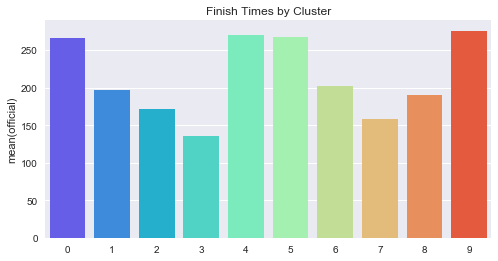

In [42]:
s = boston.groupby(['clusters'], as_index=False).mean()['official']
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(8,4)
g.set_title("Finish Times by Cluster");

Fastest cluster is cluster 3, slowest was 9.  Cluster 7 is second fastest.

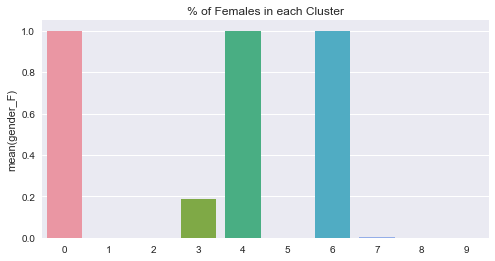

In [43]:
s = boston.groupby(['clusters'], as_index=False).mean()['gender_F']
g = sns.barplot(s.index, s)
g.figure.set_size_inches(8,4)
g.set_title("% of Females in each Cluster");

Clusters 0,4,6 are all female. Cluster 3 (the fastest) is 20% female.  Cluster 7 (the second fastest) has a small portion of females.

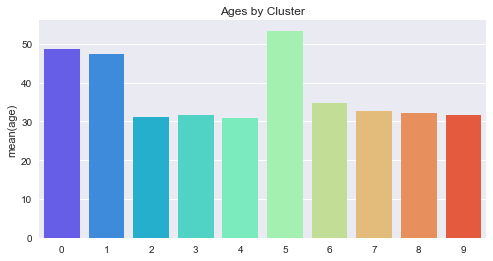

In [44]:
s = boston.groupby(['clusters'], as_index=False).mean()['age']
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(8,4)
g.set_title("Ages by Cluster");

The oldest cluster is 5, then 0 and 1.  The other clusters (2,3,4,6,7,8,9) are all about the same age on average (30-ish)

s = boston.groupby(['clusters'], as_index=False).mean()['US']
g = sns.barplot(s.index, s)
g.figure.set_size_inches(8,4)
g.set_title("% of US Citizens in each Cluster");

The cluster with the fewest Americans is cluster 3 (the fastest)

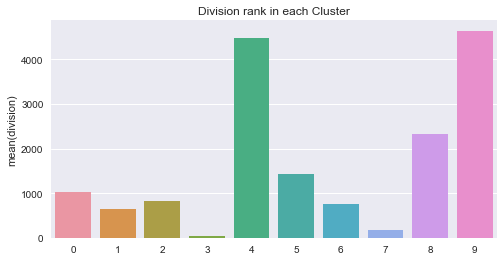

In [49]:
s = boston.groupby(['clusters'], as_index=False).mean()['division']
g = sns.barplot(s.index, s)
g.figure.set_size_inches(8,4)
g.set_title("Division rank in each Cluster");

Note that even though clusters 4 & 5 have similar finish times, cluster 5 performed much better as it relates to the ranking in the division. This is because cluster 5 is the oldest group, so the slow times are offset by the slow times of others in that division.

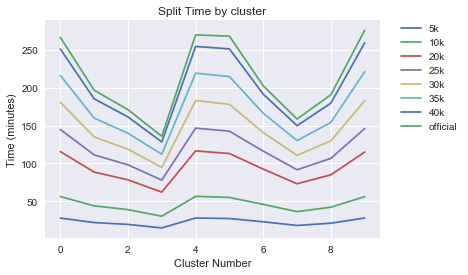

In [75]:
from pylab import *

t = boston_avg['clusters']
s = boston_avg['5k']
s2 = boston_avg['10k']
s3 = boston_avg['20k']
s4 = boston_avg['25k']
s5 = boston_avg['30k']
s6 = boston_avg['35k']
s7 = boston_avg['40k']
s8 = boston_avg['official']
a = boston_avg['age']
plot(t, s)
plot(t, s2)
plot(t, s3)
plot(t,s4)
plot(t,s5)
plot(t,s6)
plot(t,s7)
plot(t,s8)

xlabel('Cluster Number')
ylabel('Time (minutes)')
title('Split Time by cluster')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
grid(True)
show()

Specifically, use the tools at hand to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters. Write up your report, including your process from start to finish, in a Jupyter notebook and submit it below.

_________________________________________________________________________________________________________________________